**Dataset**<br>
In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).<br>
<br>
Goal: Transform "midean_house_value" (house price) and create a classification model 

In [1]:
# Preparing the environment
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # library for creating static, animated, and interactive visualizations
import seaborn as sns # data visualization library based on matplotlib

Exploratory Data Analysis // **EDA**

In [2]:
# Load the Dataset into a DataFrame
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#For the rest of the homework, I'll need to use only these columns:

df = df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'ocean_proximity',
    'median_house_value'
]]

In [4]:
# Preparation and cleaning of the data set
# Select only the features from above and fill in the missing values with 0.
df = df.fillna(0)
display(df.head())
print(f"\ndataset describe:")
display(df.describe())
print(f"\nocean_proximity unique values:")
display(df.ocean_proximity.unique())
print(f"\ndataset len:")
display(len(df))


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0



dataset describe:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



ocean_proximity unique values:


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)


dataset len:


20640

**Preparation and cleaning** of the data set

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
# Create a new column "rooms_per_household": dividing "total_rooms" by the column "households"
df['room_per_household'] = df['total_rooms'] / df['households']

In [7]:
# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [8]:
# Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df['population'] / df['households']
df.head(2).T

,0,1
latitude,37.88,37.86
longitude,-122.23,-122.22
housing_median_age,41.0,21.0
total_rooms,880.0,7099.0
total_bedrooms,129.0,1106.0
population,322.0,2401.0
households,126.0,1138.0
median_income,8.3252,8.3014
ocean_proximity,near_bay,near_bay
median_house_value,452600.0,358500.0


**Question 1**<br><br>
Goal: What is the most frequent observation (mode) for the column ocean_proximity?

In [9]:
#mode = df.ocean_proximity.value_counts().sort_values(ascending=False).head(1)
mode = df.ocean_proximity.mode()[0]

print(f"\nAnswer to question 1:")
print(f"Most frequent observation (mode) for the column ocean_proximity: {mode}")


Answer to question 1:
Most frequent observation (mode) for the column ocean_proximity: <1h_ocean


Data split<br><br>
Split your data in train/val/test sets, with 60%/20%/20% distribution.<br>
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.<br>
Make sure that the target value (median_house_value) is not in your dataframe.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# splitting the data:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

n = len(df)
n_full_train = len(df_full_train)
n_train = len(df_train)
n_val = len(df_val)
n_test = len(df_test)

print(f'n_dataset = \t\t{n}')
print(f'n_full_train = \t\t{n_full_train}')
print(f'n_train = \t\t{n_train}')
print(f'n_val = \t\t{n_val}')
print(f'n_test = \t\t{n_test}')
print(f'check of sum:\n(train + val + test) = \t{n_train + n_val + n_test}')

n_dataset = 		20640
n_full_train = 		16512
n_train = 		12384
n_val = 		4128
n_test = 		4128
check of sum:
(train + val + test) = 	20640


In [12]:
display(df_train.reset_index(drop=True).head(2))
display(df_val.reset_index(drop=True).head(2))
display(df_test.reset_index(drop=True).head(2))

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,room_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1h_ocean,241400.0,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,near_ocean,500001.0,7.564516,0.130228,2.789082


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,room_per_household,bedrooms_per_room,population_per_household
0,36.74,-119.85,35.0,1191.0,190.0,537.0,182.0,3.5375,inland,96700.0,6.543956,0.159530,2.950549
1,41.02,-124.16,23.0,1672.0,385.0,1060.0,390.0,2.1726,near_ocean,75500.0,4.287179,0.230263,2.717949


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,room_per_household,bedrooms_per_room,population_per_household
0,36.06,-119.01,25.0,1505.0,0.0,1392.0,359.0,1.6812,inland,47700.0,4.192201,0.0,3.877437
1,35.14,-119.46,30.0,2943.0,0.0,1565.0,584.0,2.5313,inland,45800.0,5.039384,0.0,2.679795


In [13]:
# separating features from the target variable :
y_full_train = df_full_train.median_house_value.values
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_full_train['median_house_value']
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Question 2
<br>
I will create a correlation matrix for the numerical features in the training data set.<br>
In the correlation matrix, I will calculate the correlation coefficient between each pair of features in the dataset.<br><br>
Goal: What are the two features that have the highest correlation in this dataset?


total_bedrooms    0.979399
households        0.979399
total_rooms       0.931546
population        0.906841
median_income     0.394154
dtype: float64


Answer to question 2:
The highest correlation in the training data set are: 
total_bedrooms    0.979399
households        0.979399
dtype: float64


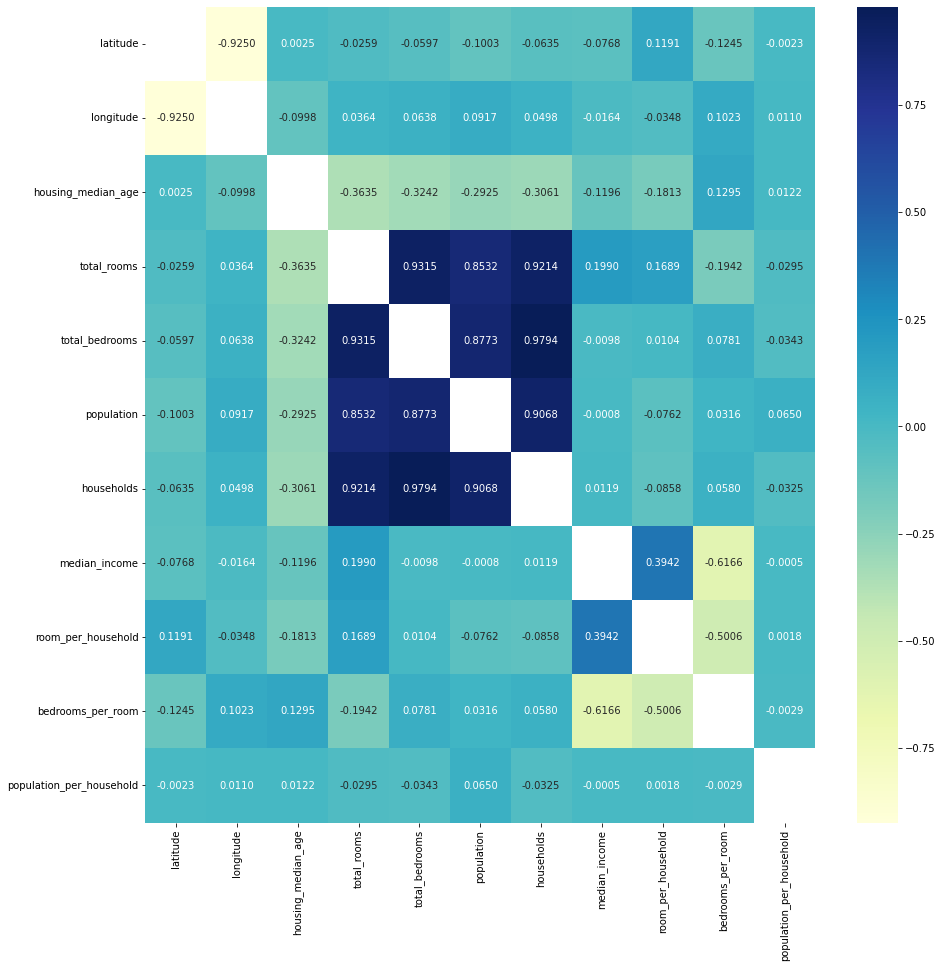

In [14]:
corr_matrix_train = df_train.corr()[df_train.corr() != 1]
display(corr_matrix_train.max().sort_values(ascending=False).head())

fig = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix_train, annot=True, fmt='.4f', cmap="YlGnBu")

print(f"\nAnswer to question 2:")
print(f"The highest correlation in the training data set are: \n{corr_matrix_train.max().sort_values(ascending=False).head(2)}")

I will convert the median_home_value feature from numeric to binary.<br>
I will create an above_average variable that has a value of 1 if median_home_value is above its mean value and 0 otherwise.



In [15]:
# convert the median_home_value variable from numeric to binary:
mean_dataset = df.median_house_value.mean()
mean_full_train = y_full_train.mean()
mean_train = y_train.mean()
mean_val = y_val.mean()
mean_test = y_test.mean()


# We create an above_average variable that has a value of 1 
# if median_home_is above its mean value and 0 otherwise.:
above_average_full_train = (y_full_train > mean_dataset).astype(int)
above_average_train = (y_train > mean_dataset).astype(int)
above_average_val = (y_val > mean_dataset).astype(int)
above_average_test = (y_test > mean_dataset).astype(int)


Question 3<br>

I will calculate the mutual information score with the (binarised) price for the categorical variable we have. <br>
I will only use the training set.<br><br>
Aim: What is the value of the mutual information? (I will round the score to 2 digits after the decimal point using round(score, 2))

In [16]:
from sklearn.metrics import mutual_info_score

score = mutual_info_score(df_train['ocean_proximity'], above_average_train)
score = round(score, 2)

print(f"\nAnswer to question 3:")
print(f"Value of mutual information: {score:.2f}")



Answer to question 3:
Value of mutual information: 0.10


Question 4
<br>
I will train a logistic regression model<br>
For the categorical variable ocean_proximity, I will use one-hot encoding.<br>
I will fit the model to the training dataset.<br>
To make the results reproducible across different versions of Scikit-Learn, I will fit the model with these parameters: (model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
<br><br>
Goal: Calculate the accuracy on the validation dataset and round it to 2 digits after the decimal point.


In [17]:
from sklearn.feature_extraction import DictVectorizer

In [18]:
# converting all datasets into dictionaries:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [19]:
# one-hot encoding of categorical variable:
dv = DictVectorizer(sparse=False)

In [20]:
# preparation of features_matrices:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# train LogisticRegression model:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, above_average_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [23]:
# perform predictions on the Validation dataset:
y_pred = model.predict(X_val)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
# calculation of accuracy:
val_accuracy = accuracy_score(above_average_val, y_pred)
print(f"\nAnswer to question 4:")
print(f'Accuracy on the validation dataset:  {round(accuracy_score(above_average_val, y_pred), 2)}')


Answer to question 4:
Accuracy on the validation dataset:  0.84


Question 5
<br>
Find the least useful feature using the feature elimination technique.<br>
I will train the model with all these features <br>
I will exclude each feature from this set and train a model without it. <br>
I will record the accuracy for each model.<br>
For each feature, I will calculate the difference between the original accuracy and the accuracy without the feature.<br><br>
Goal: Which of the following features has the smallest difference?

In [26]:
def feature_elimination(feature_removed, df_train, df_val, df_test):
    print(f'we excluding "{feature_removed}" from this set and training the model without it.')
    # creating a new df with a copy of the data and indexes of the calling object.
    df_train = df_train.copy()
    df_val = df_val.copy()
    df_test = df_test.copy()
    # excluding each feature from this set and training the model without it:
    df_train = df_train.drop(columns=[feature_removed])
    df_val = df_val.drop(columns=[feature_removed])
    df_test = df_test.drop(columns=[feature_removed])
    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')
    test_dicts = df_test.to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)
    X_test = dv.transform(test_dicts)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, above_average_train)
    y_pred = model.predict(X_val)
    accuracy_iter = accuracy_score(above_average_val, y_pred)
    print(f'recorded accuracy w/o {feature_removed}: \n\t\t\t\t{round(accuracy_score(above_average_val, y_pred), 4)}')
    return accuracy_iter

In [27]:
features = []
accuracies = []
differences = []
for feature in df_train.columns:
    features.append(feature)
    accuracy_iter = feature_elimination(feature, df_train, df_val, df_test)
    accuracies.append(accuracy_iter)
    difference_iter = val_accuracy - accuracy_iter
    differences.append(difference_iter)
    print(f'calculated difference: \t\t{difference_iter:.4f}')
    print()

we excluding "latitude" from this set and training the model without it.
recorded accuracy w/o latitude: 
				0.8341
calculated difference: 		0.0022

we excluding "longitude" from this set and training the model without it.
recorded accuracy w/o longitude: 
				0.8331
calculated difference: 		0.0031

we excluding "housing_median_age" from this set and training the model without it.
recorded accuracy w/o housing_median_age: 
				0.8309
calculated difference: 		0.0053

we excluding "total_rooms" from this set and training the model without it.
recorded accuracy w/o total_rooms: 
				0.8365
calculated difference: 		-0.0002

we excluding "total_bedrooms" from this set and training the model without it.
recorded accuracy w/o total_bedrooms: 
				0.8353
calculated difference: 		0.0010

we excluding "population" from this set and training the model without it.
recorded accuracy w/o population: 
				0.8263
calculated difference: 		0.0099

we excluding "households" from this set and training th

In [28]:
# preparing a data set to check the difference
df_analysis = pd.DataFrame({
    'feature': features,
    'accuracy': accuracies,
    'difference': differences
})
df_analysis['difference_abs'] = df_analysis['difference'].abs()
df_analysis['accuracy_val'] = val_accuracy
df_analysis = df_analysis[['feature', 'accuracy_val', 'accuracy', 'difference', 'difference_abs']]
df_analysis.sort_values(by='difference_abs')

,feature,accuracy_val,accuracy,difference,difference_abs
10,bedrooms_per_room,0.83624,0.836240,0.000000,0.000000
3,total_rooms,0.83624,0.836483,-0.000242,0.000242
9,room_per_household,0.83624,0.836483,-0.000242,0.000242
11,population_per_household,0.83624,0.835756,0.000484,0.000484
4,total_bedrooms,0.83624,0.835271,0.000969,0.000969
0,latitude,0.83624,0.834060,0.002180,0.002180
6,households,0.83624,0.833333,0.002907,0.002907
1,longitude,0.83624,0.833091,0.003149,0.003149
2,housing_median_age,0.83624,0.830911,0.005329,0.005329
5,population,0.83624,0.826308,0.009932,0.009932


In [29]:
print(f"\nAnswer to question 5:")
print(f'From the following features, the total_rooms feature has the smallest difference.\ntotal_rooms \ntotal_bedrooms\npopulation\nhouseholds')


Answer to question 5:
From the following features, the total_rooms feature has the smallest difference.
total_rooms 
total_bedrooms
population
households


Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn<br>
I will use the original "median_house value" column and apply a logarithmic transformation to that column.<br>
I will fit a Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.<br>
This model has an alpha parameter. Let's try the following values: [0, 0.01, 0.1, 1, 10]<br>
Goal: Which of these alphas leads to the best RMSE on the validation set?<br>
I'll round the RMSE results to 3 digits after the decimal point. (If there are multiple options, I will choose the smallest alpha)

In [30]:
# log1p transformation to [y]:
y_train_log1p = np.log1p(y_train)
y_val_log1p = np.log1p(y_val)

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [32]:
# Ridge regression model parameters:
alpha = 0
list_of_alphas = [0, 0.01, 0.1, 1, 10]
model = Ridge(alpha=alpha, solver="sag", random_state=42)
# model fitting:
model.fit(X_train, y_train_log1p)
# predictions on validation data:
y_pred = model.predict(X_val)
# calculate RMSE:
rmse_score = mean_squared_error(y_val_log1p, y_pred, squared=False)
print(f' alpha = {alpha}, RMSE = {round(rmse_score, 5)}')

 alpha = 0, RMSE = 0.52406


In [37]:
def alpha_parameter(alpha):
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train_log1p)
    y_pred = model.predict(X_val)
    rmse_score = mean_squared_error(y_val_log1p, y_pred, squared=False)
    rmse_score = round(rmse_score, 5)
    print(f'For alpha = {alpha:.2f} \tRMSE_score = {rmse_score}')
    return rmse_score

In [38]:
rmse_scores_list = []
for alpha in list_of_alphas:
    rmse_score = alpha_parameter(alpha)
    rmse_scores_list.append(rmse_score)

For alpha = 0.00 	RMSE_score = 0.52406
For alpha = 0.01 	RMSE_score = 0.52406
For alpha = 0.10 	RMSE_score = 0.52406
For alpha = 1.00 	RMSE_score = 0.52406
For alpha = 10.00 	RMSE_score = 0.52406


In [39]:
df_rmse = pd.DataFrame({
    'alpha': list_of_alphas,
    'rmse_score': rmse_scores_list
})

df_rmse = round(df_rmse, 3)
df_rmse.T

,0,1,2,3,4
alpha,0.000,0.010,0.100,1.000,10.000
rmse_score,0.524,0.524,0.524,0.524,0.524


In [40]:
print(f"\nAnswer to question 6:")
print(f'Because there are many options the smallest alpha is: {df_rmse.min(axis=0)[0]:.3f}')


Answer to question 6:
Because there are many options the smallest alpha is: 0.000
